ANLY561 Assignment2

Hongyang Zheng

1.

Backtracking for $x^{(1)}$:

When $x^{(0)}=1$, we have $f(x^{(0)})=1, df^0=2, dx=-df^0=-2, \alpha=\beta=0.5$

$\delta=\alpha*dx*df^0=0.5*(-2)*(2)=-2$

when $n=0, t=\beta^n=1, x_{n=0}=x^{(0)}+dx*t=-1, f(x_{n=0})=1$

Check: since $f(x^{(0)})+\delta*t=-1<f(x_{n=0})$, we need to continue.

when $n=1, t=\beta^n=0.5, x_{n=1}=x^{(0)}+dx*t=0, f(x_{n=1})=0$

Check: since $f(x^{(0)})+\delta*t=0=f(x_{n=1}),  f(x_{n=1})<f(x^{(0)})$

Therefore, $x_{n=1}$ is $x^{(1)}$


Backtracking for $x^{(2)}$:

When $x^{(1)}=0$, we have $f(x^{(1)})=0, df^1=0, dx=-df^1=0, \alpha=\beta=0.5$

$\delta=\alpha*dx*df^0=0.5*(0)*(0)=0$

when $n=0, t=\beta^n=1, x_{n=0}=x^{(1)}+dx*t=0, f(x_{n=0})=0$

Check: $f(x^{(1)})+\delta*t=0=f(x_{n=0})$,therefore, $x_{n=0}$ is $x^{(2)}=0$.

Overall, $x^{(1)}=0$ and $x^{(2)}=0$. By the following python program, we can make sure that it is correct.


In backtracking...
1
1


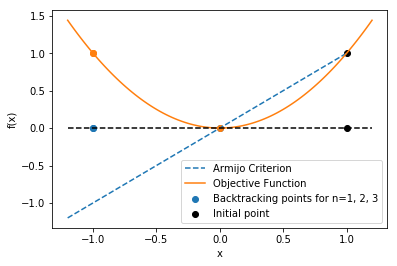

In backtracking...
0.0


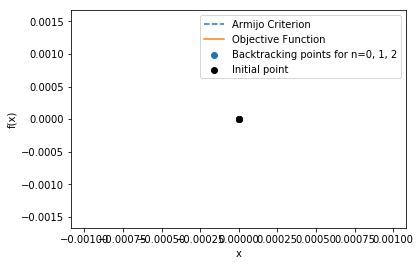

In [2]:
# Import numerical python and pyplot
import numpy as np # Namespace is np
import matplotlib.pyplot as plt # Namespace is plt 


def backtracking1D(x0, dx, f, df0, alpha=0.5, beta=0.5, verbose=False):
    '''
    Backtracking for 1D functions with illustrations
    :param x0: Previous point from backtracking $x^{(k)}$, or initial guess $x^{(0)}$
    :param dx: Incremental factor for updating x0; $\Delta x$
    :param f: Objective function
    :param df0: Derivative of f at x0 or $f^\prime(x^{(0)})$
    :param alpha: Sloping factor of stopping criterion
    :param beta: "Agressiveness" parameter for backtracking steps
    :param verbose: Boolean for providing plots to illustrate
    :return: x1, the next iterate in backtracking, or $x^{(k+1)}$
    '''
    
    print('In backtracking...')
    
    if verbose:
        n=0
        xs = [x0 + dx] * 3
    
    ######################################
    # The core of the algorithm
    ######################################
    delta = alpha * dx * df0 # Just precomputing the alpha times increment times derivative factor
    t = 1 # Initialize t=beta**0; beta**n in the loop
    f0 = f(x0) # Evaluate for future use
    x = x0 + dx # Initialize x_{0, inner}, $x = x^{(0)}+\beta^0\Delta x$
    fx = f(x)
    print(fx)
    while (not np.isfinite(fx)) or fx > f0 + delta * t:
        print(fx)
        t = beta * t
        x = x0 + t * dx
        fx = f(x)
    ###################################### 
    
        if verbose:
            n += 1
            xs.append(x)
            xs.pop(0)
            
    if verbose: 
        u = 1.1 * np.abs(xs[0] - x0)
        l = 0.1 * np.abs(xs[0] - x0)
        if dx < 0:
            s = np.linspace(x0 - u, x0 + l, 100)
            xi = [x0-u, x0]
            fxi = [f(x0) - alpha*u*df0, f(x0)]
        else:
            s = np.linspace(x0 - l, x0 + u, 100)
            xi = [x0, x0 + u]
            fxi = [f(x0), f(x0) + alpha*u*df0]
            
        y = np.zeros(len(s))
        for i in range(len(s)):
            y[i] = f(s[i]) # Slow for vectorized functions
            
        plt.figure('Backtracking illustration')
        arm, =plt.plot(xi, fxi, '--', label='Armijo Criterion')
        fcn, =plt.plot(s, y, label='Objective Function')
        plt.plot([s[0], s[-1]], [0, 0], 'k--')
        pts =plt.scatter(xs, [0 for p in xs], label='Backtracking points for n=%d, %d, %d' % (n, n+1, n+2))
        plt.scatter(xs, [f(p) for p in xs], label='Backtracking points for n=%d, %d, %d' % (n, n+1, n+2))
        init =plt.scatter([x0, x0], [0, f(x0)], color='black', label='Initial point')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.legend(handles=[arm, fcn, pts, init])
        plt.show()
    
    return x

# We illustrate a few backtracking steps for  simple quadratic

fun = lambda x: x**2
dfun = lambda x: 2*x

x0 = 1 # $x^{(0)}$
dx = -dfun(x0) # $\Delta x^{(0)} = -f^\prime(x^{(0)})$

alpha = 0.5
beta = 0.5

# First backtracking step
#x1 = backtracking1D(x0, dx, fun, dfun(x0), alpha=alpha, beta=beta, verbose=True) # get $x^{(1)}$ from $x^{(0)}$

x1 = backtracking1D(x0, -dfun(x0), fun, dfun(x0), alpha=alpha, beta=beta, verbose=True) # get $x^{(1)}$ from $x^{(0)}$

# Second backtracking step
x2 = backtracking1D(x1, -dfun(x1), fun, dfun(x1), alpha=alpha, beta=beta, verbose=True) # get $x^{(2)}$ from $x^{(1)}$

2.

Compute $g'(x)$

$$\begin{align*}
g'(x)=0+f'(x^{(k)})(1-0)+\frac{1}{2}&f''(x^{(k)})2(x-x^{(k)})(1-0)=0\\
f''(x^{(k)})(x^{(k)}-x)&=f'(x^{(k)})\\
(x^{(k)}-x)&=\frac{f'(x^{(k)})}{f''(x^{(k)})}\\
x&=x^{(k)}-\frac{f'(x^{(k)})}{f''(x^{(k)})}
\end{align*}$$

Therefore, the critical point $x^*$ coincides with the Newton update $x^{(k+1)}=x^{(k)}-\frac{f'(x^{(k)})}{f''(x^{(k)})}$

What is more, when f is convex, this critical point is the minimizing solution for f. 


3.

In [5]:
def backtracking2(x0, dx, f, df0, alpha=0.5, beta=0.5, verbose=False):
   
    if verbose:
        n=0
        xs = [x0 + dx] * 3
    
    ######################################
    # The core of the algorithm
    ######################################
    delta = alpha * dx * df0 # Just precomputing the alpha times increment times derivative factor
    t = 1 # Initialize t=beta**0; beta**n in the loop
    f0 = f(x0) # Evaluate for future use
    x = x0 + dx # Initialize x_{0, inner}, $x = x^{(0)}+\beta^0\Delta x$
    fx = f(x)
    while (not np.isfinite(fx)) or fx > f0 + delta * t:
        t = beta * t
        x = x0 + t * dx
        fx = f(x)
    ###################################### 
    
        if verbose:
            n += 1
            xs.append(x)
            xs.pop(0)
            
    if verbose: 
        u = 1.1 * np.abs(xs[0] - x0)
        l = 0.1 * np.abs(xs[0] - x0)
        if dx < 0:
            s = np.linspace(x0 - u, x0 + l, 100)
            xi = [x0-u, x0]
            fxi = [f(x0) - alpha*u*df0, f(x0)]
        else:
            s = np.linspace(x0 - l, x0 + u, 100)
            xi = [x0, x0 + u]
            fxi = [f(x0), f(x0) + alpha*u*df0]
            
        y = np.zeros(len(s))
        for i in range(len(s)):
            y[i] = f(s[i]) # Slow for vectorized functions
            
        plt.figure('Backtracking illustration')
        arm, =plt.plot(xi, fxi, '--', label='Armijo Criterion')
        fcn, =plt.plot(s, y, label='Objective Function')
        plt.plot([s[0], s[-1]], [0, 0], 'k--')
        pts =plt.scatter(xs, [0 for p in xs], label='Backtracking points for n=%d, %d, %d' % (n, n+1, n+2))
        plt.scatter(xs, [f(p) for p in xs], label='Backtracking points for n=%d, %d, %d' % (n, n+1, n+2))
        init =plt.scatter([x0, x0], [0, f(x0)], color='black', label='Initial point')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.legend(handles=[arm, fcn, pts, init])
        plt.show()
    
    return x

def accelerated_backtracking1D(k, tk, x0, x1, dx, f, df, beta=0.8, verbose=False):
    
    y = x1 + (k-1)*(x1 - x0)/(k+2) # Base point for accelerated backtracking
    
    if verbose:
        n=0
        xs = [y + tk*dx] * 3
    
    t = tk # Initialize t from the last iteration; t_0=1
    x = y + t*dx
    fx = f(x)
    fy = f(y)
    dfy = df(y)
    delta = dfy * dx

    
    while (not np.isfinite(fx)) or fy + delta*t + t*dx**2/2 < fx:
        t = beta * t
        x = y + t*dx
        fx = f(x)
    
        if verbose:
            n += 1
            xs.append(x)
            xs.pop(0)
            
    if verbose: 
        u = 1.1 * np.abs(xs[0] - y)
        l = 0.1 * np.abs(xs[0] - y)
        if dx < 0:
            s = np.linspace(y - u, y + l, 100)
            xi = np.linspace(y-u, y, 100)
        else:
            s = np.linspace(y - l, y + u, 100)
            xi = np.linspace(y, y + u, 100)
        dxi = xi-y
        fxi = fy + dfy*dxi + dxi*dx/2
            
        z = np.zeros(len(s))
        for i in range(len(s)):
            z[i] = f(s[i]) # Slow for vectorized functions
            
        plt.figure('Accelerated Backtracking illustration')
        plt.plot([s[0], s[-1]], [0, 0], 'k--')
        arm, =plt.plot(xi, fxi, '--', label='Stopping Criterion')
        fcn, =plt.plot(s, z, label='Objective Function')
        pts =plt.scatter(xs, [0 for p in xs], label='Backtracking points for n=%d, %d, %d' % (n, n+1, n+2))
        plt.scatter(xs, [f(p) for p in xs], label='Backtracking points for n=%d, %d, %d' % (n, n+1, n+2))
        init =plt.scatter([y], [fy], label='Initial point', color='black')
        plt.legend(handles=[arm, fcn, pts, init])
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.show()
    
    return x, t

def function3(x0, df, d2f, f):
    print('when x0='+ str(x0))
    iter = 50 # 50 iterations of each
    x_sd = [x0]
    f_sd = [f(x0)]
    x = x0
    for i in range(iter):
        x = x - df(x)/2 # Using the constant stepsize 2 > 1
        x_sd.append(x)
        f_sd.append(f(x))
    
    x_nm = [x0]
    f_nm = [f(x0)]
    x = x0
    for i in range(iter):
        x = x - df(x)/d2f(x) # Using the constant stepsize 2 > 1
        x_nm.append(x)
        f_nm.append(f(x))

    # Let's finish with a comparison with backtracking and accelerated backtracking

    x_sd_bt = [x0]
    f_sd_bt = [f(x0)]
    x = x0
    for i in range(iter):
        x = backtracking2(x, -df(x), f, df(x))
        x_sd_bt.append(x)
        f_sd_bt.append(f(x))

    x_nm_bt = [x0]
    f_nm_bt = [f(x0)]
    x = x0
    for i in range(iter):
        x = backtracking2(x, -df(x)/d2f(x), f, df(x))
        x_nm_bt.append(x)
        f_nm_bt.append(f(x))
    
    x_sd_abt = [x0]
    f_sd_abt = [f(x0)]
    x = backtracking2(x0, -df(x0), f, df(x0))
    x_sd_abt.append(x)
    f_sd_abt.append(f(x))
    t = 1
    for i in range(2,iter):
        x, t = accelerated_backtracking1D(i+1, t, x_sd_abt[i-2], x_sd_abt[i-1], -df(x), f, df)
        x_sd_abt.append(x)
        f_sd_abt.append(f(x))

    x_nm_abt = [x0]
    f_nm_abt = [f(x0)]
    x = backtracking2(x0, -df(x0)/d2f(x0), f, df(x0))
    x_nm_abt.append(x)
    f_nm_abt.append(f(x))
    t = 1
    for i in range(2, iter):
        x, t = accelerated_backtracking1D(i+1, t, x_nm_abt[i-2], x_nm_abt[i-1], -df(x)/d2f(x), f, df)
        x_nm_abt.append(x)
        f_nm_abt.append(f(x))

    # Compare convergence of function values with semilog plot
    sd, =plt.plot(f_sd, label='Steepest descent')
    nm, =plt.plot(f_nm, label='Newton\'s method')
    sd_bt, = plt.plot(f_sd_bt, label='SD Backtracking')
    nm_bt, = plt.plot(f_nm_bt, label='NM Backtracking')
    sd_abt, = plt.plot(f_sd_abt, label='SD Backtracking+')
    nm_abt, = plt.plot(f_nm_abt, label='NM Backtracking+')
    plt.xlabel('Iteration Index')
    plt.ylabel('Iterate Value Error')
    plt.legend(handles=[sd, nm, sd_bt, nm_bt, sd_abt, nm_abt])
    plt.title('Semilog plot of function values')
    plt.show()

    # Compare convergece of iterates to the minimizer
    sd, =plt.plot(np.abs(x_sd), label='Steepest descent')
    nm, =plt.plot(np.abs(x_nm), label='Newton\'s method')
    sd_bt, = plt.plot(np.abs(x_sd_bt), label='SD Backtracking')
    nm_bt, = plt.plot(np.abs(x_nm_bt), label='NM Backtracking')
    sd_abt, = plt.plot(np.abs(x_sd_abt), label='SD Backtracking+')
    nm_abt, = plt.plot(np.abs(x_nm_abt), label='NM Backtracking+')
    plt.xlabel('Iteration Index')
    plt.ylabel('Iterate Error')
    plt.legend(handles=[sd, nm, sd_bt, nm_bt, sd_abt, nm_abt])
    plt.title('Semilog plot of iterate error')
    plt.show()
    
def function1(x0, df, d2f, f):
    print('when x0='+ str(x0))
    iter = 50 # 50 iterations of each
    x_sd = [x0]
    f_sd = [f(x0)]
    x = x0
    for i in range(iter):
        x = x - df(x)/2 # Using the constant stepsize 2 > 1
        x_sd.append(x)
        f_sd.append(f(x))
    
    x_nm = [x0]
    f_nm = [f(x0)]
    x = x0
    for i in range(iter):
        x = x - df(x)/d2f(x) # Using the constant stepsize 2 > 1
        x_nm.append(x)
        f_nm.append(f(x))

    # Let's finish with a comparison with backtracking and accelerated backtracking

    x_sd_bt = [x0]
    f_sd_bt = [f(x0)]
    x = x0
    for i in range(iter):
        x = backtracking2(x, -df(x), f, df(x))
        x_sd_bt.append(x)
        f_sd_bt.append(f(x))

    x_nm_bt = [x0]
    f_nm_bt = [f(x0)]
    x = x0
    for i in range(iter):
        x = backtracking2(x, -df(x)/d2f(x), f, df(x))
        x_nm_bt.append(x)
        f_nm_bt.append(f(x))
    
    x_sd_abt = [x0]
    f_sd_abt = [f(x0)]
    x = backtracking2(x0, -df(x0), f, df(x0))
    x_sd_abt.append(x)
    f_sd_abt.append(f(x))
    t = 1
    for i in range(2,iter):
        x, t = accelerated_backtracking1D(i+1, t, x_sd_abt[i-2], x_sd_abt[i-1], -df(x), f, df)
        x_sd_abt.append(x)
        f_sd_abt.append(f(x))

    x_nm_abt = [x0]
    f_nm_abt = [f(x0)]
    x = backtracking2(x0, -df(x0)/d2f(x0), f, df(x0))
    x_nm_abt.append(x)
    f_nm_abt.append(f(x))
    t = 1
    for i in range(2, iter):
        x, t = accelerated_backtracking1D(i+1, t, x_nm_abt[i-2], x_nm_abt[i-1], -df(x)/d2f(x), f, df)
        x_nm_abt.append(x)
        f_nm_abt.append(f(x))

    # Compare convergence of function values with semilog plot
    sd, =plt.semilogy(f_sd, label='Steepest descent')
    nm, =plt.semilogy(f_nm, label='Newton\'s method')
    sd_bt, = plt.semilogy(f_sd_bt, label='SD Backtracking')
    nm_bt, = plt.semilogy(f_nm_bt, label='NM Backtracking')
    sd_abt, = plt.semilogy(f_sd_abt, label='SD Backtracking+')
    nm_abt, = plt.semilogy(f_nm_abt, label='NM Backtracking+')
    plt.xlabel('Iteration Index')
    plt.ylabel('Iterate Value Error')
    plt.legend(handles=[sd, nm, sd_bt, nm_bt, sd_abt, nm_abt])
    plt.title('Semilog plot of function values')
    plt.show()

    # Compare convergece of iterates to the minimizer
    sd, =plt.semilogy(np.abs(x_sd), label='Steepest descent')
    nm, =plt.semilogy(np.abs(x_nm), label='Newton\'s method')
    sd_bt, = plt.semilogy(np.abs(x_sd_bt), label='SD Backtracking')
    nm_bt, = plt.semilogy(np.abs(x_nm_bt), label='NM Backtracking')
    sd_abt, = plt.semilogy(np.abs(x_sd_abt), label='SD Backtracking+')
    nm_abt, = plt.semilogy(np.abs(x_nm_abt), label='NM Backtracking+')
    plt.xlabel('Iteration Index')
    plt.ylabel('Iterate Error')
    plt.legend(handles=[sd, nm, sd_bt, nm_bt, sd_abt, nm_abt])
    plt.title('Semilog plot of iterate error')
    plt.show()

(a). 

1.When $x_0=10$:

The rate of convergence of the function values is faster when we apply steepest descent, with the function values error decreases dramatically at the beginning. The function values error decreases for Newton's method too, but the rate is smaller and after decreasing, the error term is still bigger for accelerated backtracking Newton's mothod.

The rate of convergence of the iterates is almost same for steepest descent and Newton's method, but the iterate error decreases with n for backtracking steepest descent.

When $x_0=100$:

The rate of convergence of the function values is faster when we apply steepest descent, with the function values error decreases dramatically at the beginning. The function values error decreases for Newton's method too, but the rate is smaller.

The rate of convergence of the iterates is almost same for steepest descent and Newton's method, but the iterate error increases dramatically with n for steepest descent.

When $x_0=1000$: Out of range, so there is no plot.

What is more, steepest descent has bigger error when we increase $x_0$

when x0=10


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


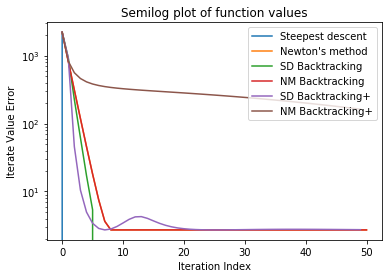

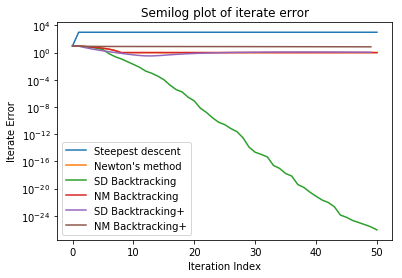

when x0=100


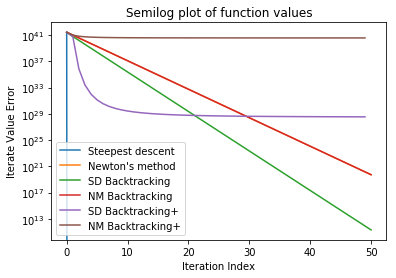

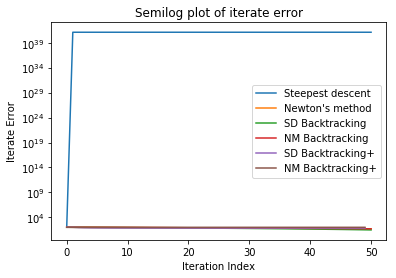

when x0=1000


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:127: RuntimeWarning: invalid value encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


In [ ]:
f = lambda x:  np.exp(x)/x 
df = lambda x: (np.exp(x)*(x-1))/x**2
d2f = lambda x: (np.exp(x)*(x**2-2*x+2))/x**3    
    
function1(10, df, d2f, f)
function1(100, df, d2f, f)
function3(1000, df, d2f, f)

(b). 
 
1.When $x_0=10$:

The rate of convergence of the function values is almost the same for the two methods. For Newton's method, the function values error increases or keeps constant with n, while this error decreases at first dramatically for steepest descent.  

The rate of convergence of the iterates is almost the same for steepest descent and Newton's method, but the iterates error increases with n for Newton's method. 

When $x_0=100$:

The rate of convergence of the function values is almost the same for the two methods. For Newton's method, the function values error increases or keeps constant with n, while this error keeps constant for steepest descent.  

The rate of convergence of the iterates is almost the same for steepest descent and Newton's method, but the iterates error increases with n for Newton's method. 


When $x_0=1000$: 

The rate of convergence of the function values is almost the same for the two methods. For Newton's method, the function values error increases or keeps constant with n, while this error keeps constant for steepest descent.  

The rate of convergence of the iterates is almost the same for steepest descent and Newton's method, but the iterates error increases with n for Newton's method. 

What is more, the error term for both function values and iterates is increasing when $x_0$ increases.


when x0=10


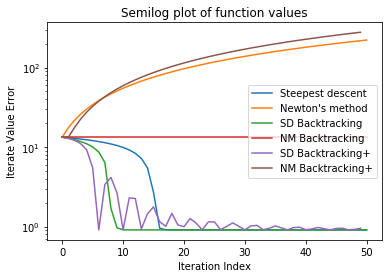

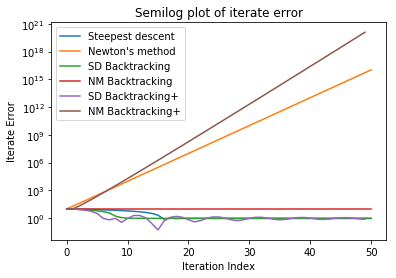

when x0=100


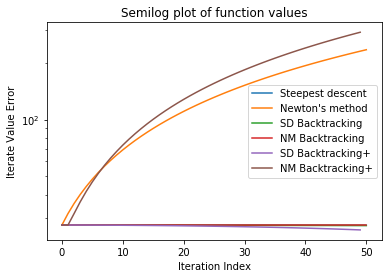

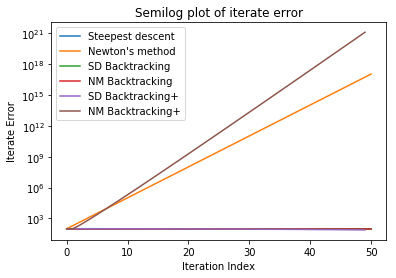

when x0=1000


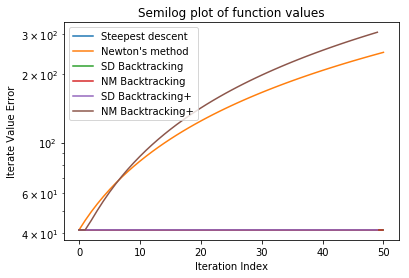

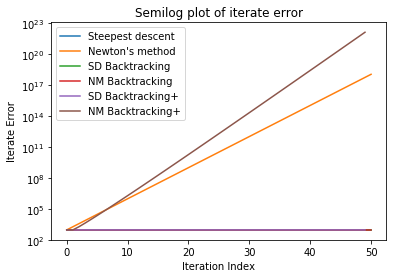

In [7]:
f = lambda x: np.log(x**2+1)+np.log((x-1)**2+1)+np.log((x-3/2)**2+1)
df = lambda x: (24*x**5-100*x**4+196*x**3-210*x**2+142*x-50)/((x**2+1)*(x**2-2*x+2)*(4*x**2-12*x+13))
d2f = lambda x: (-96*x**10+800*x**9-3176*x**8+7840*x**7-12932*x**6+14140*x**5-8538*x**4-320*x**3+5206*x**2-3820*x+1192)/(((x**2+1)**2)*((x**2-2*x+2)**2)*((4*x**2-12*x+13)**2))
    
function1(10, df, d2f, f)
function1(100, df, d2f, f)
function1(1000, df, d2f, f)

(c).

1.When $x_0=10$:

The rate of convergence of the function values is almost same for the two methods. Newton's method has a decreasing function values error, which is approching to 0 round $n=5$, while steepest descent has bigger error(for steepest descent accelerated backtracking).

The rate of convergence of the iterates is almost same for steepest descent and Newton's method, but the iterates error increases dramatically for accelerated backtracking Newton's method when $n>40$. 

When $x_0=100$:

The rate of convergence of the function values is almost same for the two methods. Newton's method has a decreasing function values error, which is approching to 0 round $n=5$, while steepest descent keeps constant. 

The rate of convergence of the iterates is almost same for steepest descent and Newton's method. The iterates error increases dramatically for accelerated backtracking Newton's method when $n>40$. 


When $x_0=1000$: 

The rate of convergence of the function values is almost same for the two methods. Newton's method has a decreasing function values error, which is approching to 0 round $n=5$, while steepest descent keeps constant. 

The rate of convergence of the iterates is almost same for steepest descent and Newton's method. The iterates error increases dramatically for accelerated backtracking Newton's method when $n>40$. 

What is more, when $x_0$ increases, the error for function values decreases for steepest descent.

when x0=10


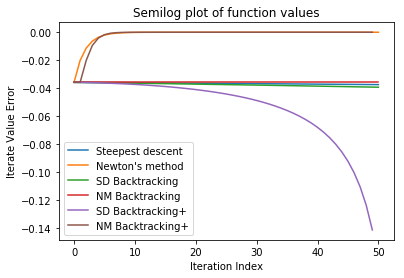

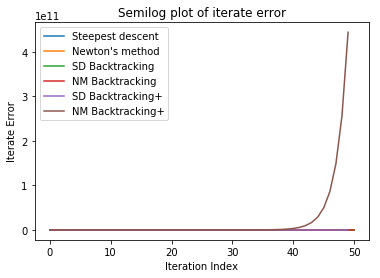

when x0=100


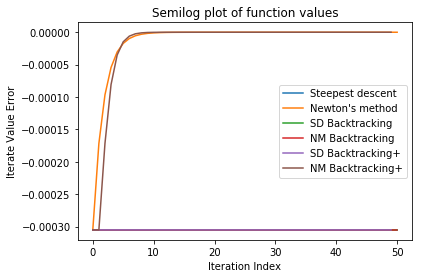

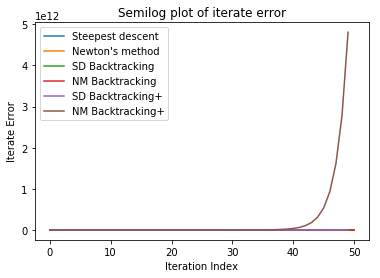

when x0=1000


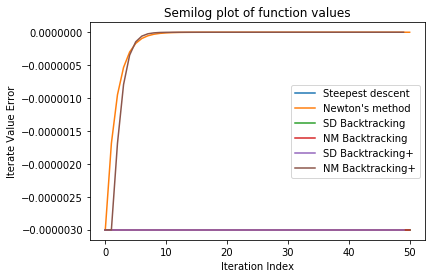

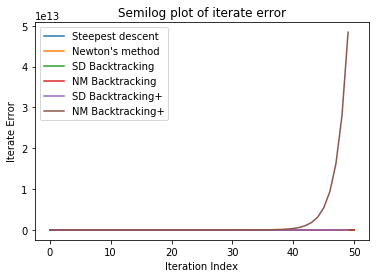

In [6]:
f = lambda x: -(1/(x**2+1))-(1/((x-1)**2+1))-(1/((x-1.5)**2+1))
df = lambda x:2*x/(x**2+1)**2+2*(x-1)/((x-1)**2+1)**2+2*(x-1.5)/((x-1.5)**2+1)**2
d2f = lambda x: (2/(x**2+1)**2)-(8*x**2/(x**2+1)**3)-(8*(x-1.5)**2/((x-1.5)**2+1)**3)-(8*(x-1)**2/((x-1)**2+1)**3)+(2/((x-1.5)**2+1)**2)+(2/((x-1)**2+1)**2)                                                                                            
                                                                              
function3(10, df, d2f, f)
function3(100, df, d2f, f)
function3(1000, df, d2f, f)